# Data Prepartion

## Import the libraries

In [1]:
import numpy as np
import pandas as pd

## Loading the dataset

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv',index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv',index_col=0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv',index_col=0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv',index_col=0)

## Exploring Data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:27.9-30.7,dti:30.7-34.7,dti:>34.7,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,1


In [5]:
loan_data_inputs_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 325)

In [8]:
loan_data_targets_test.shape

(93257, 1)

## Selecting the Features

* selecting the independents variables

In [9]:
loan_data_inputs_train['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [10]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['Grade:A',
"Grade:B",
"Grade:C",
"Grade:D",
"Grade:E",
"Grade:F",
"Grade:G",
"home_ownership:RENT_OTHER_NONE_ANY",
"home_ownership OWN",
"home_ownership MORTGAGE",
"addr_state:NV_LA",
"addr_state:HI_SD",
"addr_state:AZ_PA_OK",
"addr_state:MD_FL_VA_MA",
"addr_state:AR_DE_WV_MO_IN",
"addr_state:OH_NC",
"addr_state:AL_MI",
"addr_state:TX_NJ_GA",
"addr_state:AK_WI",
"addr_state:WA_CT",
"addr_state:NH_KS_DC_WY_ME_ID",
"addr_state:NE_IA_MS_MT_TN_RI_ND",
"addr_state:NY",
"addr_state:CA",
"addr_state:VT",
"verification_status:Verified",
"verification_status:Not Verified",
"verification_status:Source Verified",
"purpose:edu_small_house_mov",
"purpose:other_med",
"purpose:debt",
"purpose:_vaca_credit",
"purpose:major_rene_car_wedd",
"initial_list_status:f",
"initial_list_status:w",
"term_int:36",
"term_int:60",
"emp_length_int:0",
"emp_length_int:1",
"emp_length_int:2-3",
"emp_length_int:4-5",
"emp_length_int:6-8",
"emp_length_int:9",
"emp_length_int:10",
"months_issue_date:<38",
"months_issue_date:40-49",
"months_issue_date:49-56",
"months_issue_date:56-60",
"months_issue_date:60-66",
"months_issue_date:66-74",
"months_issue_date:74-82",
"months_issue_date:>82",
"int_rate:<7.071",
"int_rate:7.071-11.199",
"int_rate:11.199-13.263",
"int_rate:13.263-15.327",
"int_rate:15.327-19.868",
"int_rate:19.868-25.234",
"int_rate:>25.324",
"mths_since_earliest_cr_line_factor:<126",
"mths_since_earliest_cr_line_factor:126-173",
"mths_since_earliest_cr_line_factor:173-345",
"mths_since_earliest_cr_line_factor:345-438",
"mths_since_earliest_cr_line_factor:>438",
"delinq_2yrs:0",
"delinq_2yrs:1-5",
"delinq_2yrs:>=6",
"inq_last_6mths:0-3",
"inq_last_6mths:3-6",
"inq_last_6mths:>6",
"open_acc:0",
"open_acc:1-4",
"open_acc:5-13",
"open_acc:13-26",
"open_acc:26-32",
"open_acc:>32",
"pub_rec:0-2",
"pub_rec:2-4",
"pub_rec:>5",
"total_acc:<=27",
"total_acc:27-51",
"total_acc:>=51",
"acc_now_delinq:0",
"acc_now_delinq:>=1",
"total_rev_hi_lim:<=5K",
"total_rev_hi_lim:5K-10K",
"total_rev_hi_lim:10K-20K",
"total_rev_hi_lim:20K-30K",
"total_rev_hi_lim:30K-40K",
"total_rev_hi_lim:40K-55K",
"total_rev_hi_lim:55K-95K",
"total_rev_hi_lim:>95K",
"annual_inc:<20K",
"annual_inc:20K-30K",
"annual_inc:30K-40K",
"annual_inc:40K-50K",
"annual_inc:50K-60K",
"annual_inc:60K-70K",
"annual_inc:70K-80K",
"annual_inc:80K-90K",
"annual_inc:90K-100K",
"annual_inc:100K-120K",
"annual_inc:120K-140K",
"annual_inc:>140K",
"mths_since_last_delinq:Missing",
"mths_since_last_delinq:0-3",
"mths_since_last_delinq:3-18",
"mths_since_last_delinq:18-30",
"mths_since_last_delinq:30-82",
"mths_since_last_delinq:>82",
"dti:<=1.2",
"dti:1.2-4.3",
"dti:4.3-13.9",
"dti:13.9-21.9",
"dti:21.9-27.9",
"dti:27.9-30.7",
"dti:30.7-34.7",
"dti:>34.7",
"mths_since_last_record:Missing",
"mths_since_last_record:0-2",
"mths_since_last_record:2-12",
"mths_since_last_record:12-29",
"mths_since_last_record:29-33",
"mths_since_last_record:33-85",
"mths_since_last_record:>=85",
]]

In [11]:
ref_categories = ["Grade:G",
"home_ownership:RENT_OTHER_NONE_ANY",
"addr_state:NE_IA_MS_MT_TN_RI_ND",
"verification_status:Verified",
"purpose:edu_small_house_mov",
"initial_list_status:f",
"term_int:60",
"emp_length_int:0",
"months_issue_date:>82",
"int_rate:>25.324",
"mths_since_earliest_cr_line_factor:<126",
"delinq_2yrs:>=6",
"inq_last_6mths:>6",
"open_acc:0",
"pub_rec:0-2",
"total_acc:<=27",
"acc_now_delinq:0",
"total_rev_hi_lim:<=5K",
"annual_inc:<20K",
"mths_since_last_delinq:0-3",
"dti:>34.7",
"mths_since_last_record:0-2",]

In [12]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis=1)

In [13]:
inputs_train.head()

,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,home_ownership OWN,home_ownership MORTGAGE,addr_state:NV_LA,addr_state:HI_SD,...,dti:13.9-21.9,dti:21.9-27.9,dti:27.9-30.7,dti:30.7-34.7,mths_since_last_record:Missing,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
reg = LogisticRegression()

In [16]:
pd.options.display.max_rows = None

In [17]:
reg.fit(inputs_train, loan_data_targets_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
reg.intercept_

array([-1.72386931])

In [19]:
reg.coef_

array([[ 1.65356462e+00,  1.18030168e+00,  9.62325437e-01,
         6.81289556e-01,  3.59562766e-01,  2.06342989e-01,
         1.19011115e-01,  1.51306229e-01, -2.72873029e-01,
        -2.13381267e-01, -1.97906107e-01, -1.77799024e-01,
        -2.04049612e-02, -4.74470379e-02,  1.10028129e-03,
        -6.20346635e-02,  6.75163533e-02,  1.69476762e-01,
         4.41259323e-01, -1.97785298e-01, -2.94511300e-02,
         4.14270453e-02,  4.80418188e-02, -2.88544973e-02,
         1.90913873e-01,  1.09899720e-01,  1.10742098e-01,
         4.48401231e-01, -5.06503690e-03,  7.06412627e-02,
         6.18695922e-03,  6.99016933e-02,  1.22664572e-01,
         6.21827157e-03, -1.30848001e-01,  2.22086314e-02,
        -6.36953632e-02,  1.61813726e-01,  5.43801405e-01,
         7.29692013e-01,  1.64952634e+00,  1.99348997e+00,
         2.10091445e+00,  6.21944941e-01,  7.49308366e-02,
        -1.83615813e-01, -2.79087464e-01, -2.29983944e-01,
        -6.33093075e-02, -7.34975580e-05,  4.09745337e-0

In [20]:
feature_name = inputs_train.columns.values
feature_name

array(['Grade:A', 'Grade:B', 'Grade:C', 'Grade:D', 'Grade:E', 'Grade:F',
       'home_ownership OWN', 'home_ownership MORTGAGE',
       'addr_state:NV_LA', 'addr_state:HI_SD', 'addr_state:AZ_PA_OK',
       'addr_state:MD_FL_VA_MA', 'addr_state:AR_DE_WV_MO_IN',
       'addr_state:OH_NC', 'addr_state:AL_MI', 'addr_state:TX_NJ_GA',
       'addr_state:AK_WI', 'addr_state:WA_CT',
       'addr_state:NH_KS_DC_WY_ME_ID', 'addr_state:NY', 'addr_state:CA',
       'addr_state:VT', 'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:other_med',
       'purpose:debt', 'purpose:_vaca_credit',
       'purpose:major_rene_car_wedd', 'initial_list_status:w',
       'term_int:36', 'emp_length_int:1', 'emp_length_int:2-3',
       'emp_length_int:4-5', 'emp_length_int:6-8', 'emp_length_int:9',
       'emp_length_int:10', 'months_issue_date:<38',
       'months_issue_date:40-49', 'months_issue_date:49-56',
       'months_issue_date:56-60', 'months_issue_date:60-66',
  

## Build a logistic Regression model with p-values

* Calculating the p_values for LR, there is no built in way to do that
* By doing it in sklearn module is more tricky
* So, we use user defined fuction for it

In [21]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values :
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [22]:
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train, loan_data_targets_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [24]:
p_values = reg.p_values

In [25]:
p_values = np.append(np.nan,np.array(p_values))

In [26]:
summary_table.shape

(104, 2)

In [27]:
summary_table['p_values'] = p_values

> We select only dummby variable which has p value below than 0.01 or 0.001

we exluded variables like

* total_rev_hi_lim
* total_acc
* pub_rec
* open_acc
* delinq_2yrs

In [28]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,[
"Grade:A",
"Grade:B",
"Grade:C",
"Grade:D",
"Grade:E",
"Grade:F",
"Grade:G",
"home_ownership:RENT_OTHER_NONE_ANY",
"home_ownership OWN",
"home_ownership MORTGAGE",
"addr_state:NV_LA",
"addr_state:HI_SD",
"addr_state:AZ_PA_OK",
"addr_state:MD_FL_VA_MA",
"addr_state:AR_DE_WV_MO_IN",
"addr_state:OH_NC",
"addr_state:AL_MI",
"addr_state:TX_NJ_GA",
"addr_state:AK_WI",
"addr_state:WA_CT",
"addr_state:NH_KS_DC_WY_ME_ID",
"addr_state:NE_IA_MS_MT_TN_RI_ND",
"addr_state:NY",
"addr_state:CA",
"addr_state:VT",
"verification_status:Verified",
"verification_status:Not Verified",
"verification_status:Source Verified",
"purpose:edu_small_house_mov",
"purpose:other_med",
"purpose:debt",
"purpose:_vaca_credit",
"purpose:major_rene_car_wedd",
"initial_list_status:f",
"initial_list_status:w",
"term_int:36",
"term_int:60",
"emp_length_int:0",
"emp_length_int:1",
"emp_length_int:2-3",
"emp_length_int:4-5",
"emp_length_int:6-8",
"emp_length_int:9",
"emp_length_int:10",
"months_issue_date:<38",
"months_issue_date:40-49",
"months_issue_date:49-56",
"months_issue_date:56-60",
"months_issue_date:60-66",
"months_issue_date:66-74",
"months_issue_date:74-82",
"months_issue_date:>82",
"int_rate:<7.071",
"int_rate:7.071-11.199",
"int_rate:11.199-13.263",
"int_rate:13.263-15.327",
"int_rate:15.327-19.868",
"int_rate:19.868-25.234",
"int_rate:>25.324",
"mths_since_earliest_cr_line_factor:<126",
"mths_since_earliest_cr_line_factor:126-173",
"mths_since_earliest_cr_line_factor:173-345",
"mths_since_earliest_cr_line_factor:345-438",
"mths_since_earliest_cr_line_factor:>438",
"inq_last_6mths:0-3",
"inq_last_6mths:3-6",
"inq_last_6mths:>6",
"acc_now_delinq:0",
"acc_now_delinq:>=1",
"annual_inc:<20K",
"annual_inc:20K-30K",
"annual_inc:30K-40K",
"annual_inc:40K-50K",
"annual_inc:50K-60K",
"annual_inc:60K-70K",
"annual_inc:70K-80K",
"annual_inc:80K-90K",
"annual_inc:90K-100K",
"annual_inc:100K-120K",
"annual_inc:120K-140K",
"annual_inc:>140K",
"mths_since_last_delinq:Missing",
"mths_since_last_delinq:0-3",
"mths_since_last_delinq:3-18",
"mths_since_last_delinq:18-30",
"mths_since_last_delinq:30-82",
"mths_since_last_delinq:>82",
"dti:<=1.2",
"dti:1.2-4.3",
"dti:4.3-13.9",
"dti:13.9-21.9",
"dti:21.9-27.9",
"dti:27.9-30.7",
"dti:30.7-34.7",
"dti:>34.7",
"mths_since_last_record:Missing",
"mths_since_last_record:0-2",
"mths_since_last_record:2-12",
"mths_since_last_record:12-29",
"mths_since_last_record:29-33",
"mths_since_last_record:33-85",
"mths_since_last_record:>=85",
]]

In [29]:
ref_categories = ["Grade:G",
"home_ownership:RENT_OTHER_NONE_ANY",
"addr_state:NE_IA_MS_MT_TN_RI_ND",
"verification_status:Verified",
"purpose:edu_small_house_mov",
"initial_list_status:f",
"term_int:60",
"emp_length_int:0",
"months_issue_date:>82",
"int_rate:>25.324",
"mths_since_earliest_cr_line_factor:<126",
"inq_last_6mths:>6",
"acc_now_delinq:0",
"annual_inc:<20K",
"mths_since_last_delinq:0-3",
"dti:>34.7",
"mths_since_last_record:0-2",]

In [30]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis=1)
inputs_train.head()

,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,home_ownership OWN,home_ownership MORTGAGE,addr_state:NV_LA,addr_state:HI_SD,...,dti:13.9-21.9,dti:21.9-27.9,dti:27.9-30.7,dti:30.7-34.7,mths_since_last_record:Missing,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [31]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train,loan_data_targets_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
feature_name = inputs_train.columns.values

In [140]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)  # reg2 model has changed
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Feature name,Coefficients
0,Intercept,-1.352940
1,Grade:A,1.646616
2,Grade:B,1.162325
3,Grade:C,0.942375
4,Grade:D,0.664746


In [34]:
p_values  = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.352940,NaN
1,Grade:A,1.646616,4.257252e-19
2,Grade:B,1.162325,3.214945e-12
3,Grade:C,0.942375,4.764591e-10
4,Grade:D,0.664746,2.749623e-06
5,Grade:E,0.344822,1.080571e-02
6,Grade:F,0.193864,1.453522e-01
7,home_ownership OWN,0.130969,3.929184e-03
8,home_ownership MORTGAGE,0.157803,4.490108e-08
9,addr_state:NV_LA,-0.269776,5.042369e-04


In [35]:
import pickle
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# PD Model Validation (Test)

In [36]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,[
 "Grade:A",
"Grade:B",
"Grade:C",
"Grade:D",
"Grade:E",
"Grade:F",
"Grade:G",
"home_ownership:RENT_OTHER_NONE_ANY",
"home_ownership OWN",
"home_ownership MORTGAGE",
"addr_state:NV_LA",
"addr_state:HI_SD",
"addr_state:AZ_PA_OK",
"addr_state:MD_FL_VA_MA",
"addr_state:AR_DE_WV_MO_IN",
"addr_state:OH_NC",
"addr_state:AL_MI",
"addr_state:TX_NJ_GA",
"addr_state:AK_WI",
"addr_state:WA_CT",
"addr_state:NH_KS_DC_WY_ME_ID",
"addr_state:NE_IA_MS_MT_TN_RI_ND",
"addr_state:NY",
"addr_state:CA",
"addr_state:VT",
"verification_status:Verified",
"verification_status:Not Verified",
"verification_status:Source Verified",
"purpose:edu_small_house_mov",
"purpose:other_med",
"purpose:debt",
"purpose:_vaca_credit",
"purpose:major_rene_car_wedd",
"initial_list_status:f",
"initial_list_status:w",
"term_int:36",
"term_int:60",
"emp_length_int:0",
"emp_length_int:1",
"emp_length_int:2-3",
"emp_length_int:4-5",
"emp_length_int:6-8",
"emp_length_int:9",
"emp_length_int:10",
"months_issue_date:<38",
"months_issue_date:40-49",
"months_issue_date:49-56",
"months_issue_date:56-60",
"months_issue_date:60-66",
"months_issue_date:66-74",
"months_issue_date:74-82",
"months_issue_date:>82",
"int_rate:<7.071",
"int_rate:7.071-11.199",
"int_rate:11.199-13.263",
"int_rate:13.263-15.327",
"int_rate:15.327-19.868",
"int_rate:19.868-25.234",
"int_rate:>25.324",
"mths_since_earliest_cr_line_factor:<126",
"mths_since_earliest_cr_line_factor:126-173",
"mths_since_earliest_cr_line_factor:173-345",
"mths_since_earliest_cr_line_factor:345-438",
"mths_since_earliest_cr_line_factor:>438",
"inq_last_6mths:0-3",
"inq_last_6mths:3-6",
"inq_last_6mths:>6",
"acc_now_delinq:0",
"acc_now_delinq:>=1",
"annual_inc:<20K",
"annual_inc:20K-30K",
"annual_inc:30K-40K",
"annual_inc:40K-50K",
"annual_inc:50K-60K",
"annual_inc:60K-70K",
"annual_inc:70K-80K",
"annual_inc:80K-90K",
"annual_inc:90K-100K",
"annual_inc:100K-120K",
"annual_inc:120K-140K",
"annual_inc:>140K",
"mths_since_last_delinq:Missing",
"mths_since_last_delinq:0-3",
"mths_since_last_delinq:3-18",
"mths_since_last_delinq:18-30",
"mths_since_last_delinq:30-82",
"mths_since_last_delinq:>82",
"dti:<=1.2",
"dti:1.2-4.3",
"dti:4.3-13.9",
"dti:13.9-21.9",
"dti:21.9-27.9",
"dti:27.9-30.7",
"dti:30.7-34.7",
"dti:>34.7",
"mths_since_last_record:Missing",
"mths_since_last_record:0-2",
"mths_since_last_record:2-12",
"mths_since_last_record:12-29",
"mths_since_last_record:29-33",
"mths_since_last_record:33-85",
"mths_since_last_record:>=85",
]]

In [37]:
ref_categories = ["Grade:G",
    "home_ownership:RENT_OTHER_NONE_ANY",
    "addr_state:NE_IA_MS_MT_TN_RI_ND",
    "verification_status:Verified",
    "purpose:edu_small_house_mov",
    "initial_list_status:f",
    "term_int:60",
    "emp_length_int:0",
    "months_issue_date:>82",
    "int_rate:>25.324",
    "mths_since_earliest_cr_line_factor:<126",
    "inq_last_6mths:>6",
    "acc_now_delinq:0",
    "annual_inc:<20K",
    "mths_since_last_delinq:0-3",
    "dti:>34.7",
    "mths_since_last_record:0-2"]

In [38]:
input_test = inputs_test_with_ref_cat.drop(ref_categories,axis=1)
input_test.head()

,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,home_ownership OWN,home_ownership MORTGAGE,addr_state:NV_LA,addr_state:HI_SD,...,dti:13.9-21.9,dti:21.9-27.9,dti:27.9-30.7,dti:30.7-34.7,mths_since_last_record:Missing,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85
362514,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
y_hat_test = reg2.model.predict(input_test)

In [40]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
y_hat_test_proba = reg2.model.predict_proba(input_test)

> here first column is means that it bad browwer and second be good browwer

In [42]:
y_hat_test_proba

array([[0.01661791, 0.98338209],
       [0.06100369, 0.93899631],
       [0.00462422, 0.99537578],
       ...,
       [0.00710724, 0.99289276],
       [0.00568771, 0.99431229],
       [0.00353422, 0.99646578]])

In [43]:
y_hat_test_proba[:][:,1]

array([0.98338209, 0.93899631, 0.99537578, ..., 0.99289276, 0.99431229,
       0.99646578])

In [44]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

> here y_hat_test_proba has value of probability to be a good browwer

In [45]:
y_hat_test_proba.shape

(93257,)

In [46]:
loan_data_targets_test_temp = loan_data_targets_test

In [47]:
loan_data_targets_test_temp.reset_index(drop=True,inplace=True)

In [48]:
df_actual_predicated_probs = pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)
df_actual_predicated_probs.head()

,good_bad,0
0,1,0.983382
1,1,0.938996
2,1,0.995376
3,1,0.976322
4,1,0.996652


In [49]:
df_actual_predicated_probs.shape

(93257, 2)

In [50]:
df_actual_predicated_probs.columns = ['loan_data_targets_test','y_hat_test_proba']

In [51]:
df_actual_predicated_probs.index = loan_data_inputs_test.index

In [52]:
df_actual_predicated_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.983382
288564,1,0.938996
213591,1,0.995376
263083,1,0.976322
165001,1,0.996652


## Accuracy and Area under the Curve

In [53]:
tr = 0.9
df_actual_predicated_probs['y_hat_test'] = np.where(df_actual_predicated_probs['y_hat_test_proba']> tr ,1,0)

In [54]:
pd.crosstab(df_actual_predicated_probs['loan_data_targets_test'],df_actual_predicated_probs['y_hat_test'], rownames= ['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,82,1639
1,238,91298


In [55]:
pd.crosstab(df_actual_predicated_probs['loan_data_targets_test'], df_actual_predicated_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,82,1639
1,238,91298


In [56]:
pd.crosstab(df_actual_predicated_probs['loan_data_targets_test'],df_actual_predicated_probs['y_hat_test'], rownames= ['Actual'],colnames=['Predicted']) / df_actual_predicated_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000879,0.017575
1,0.002552,0.978994


In [57]:
pd.crosstab(df_actual_predicated_probs['loan_data_targets_test'],df_actual_predicated_probs['y_hat_test'], rownames= ['Actual'],colnames=['Predicted']) / df_actual_predicated_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000879,0.017575
1,0.002552,0.978994


In [58]:
(pd.crosstab(df_actual_predicated_probs['loan_data_targets_test'], df_actual_predicated_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicated_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicated_probs['loan_data_targets_test'], df_actual_predicated_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicated_probs.shape[0]).iloc[1, 1]

0.9798728245600866

> So, accuracy is 0.981524. In credit risk modeling we have to minimize the risk, but still we give out loans.

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

* 1st array is FP Rate, 2nd array is TP, 3rd array is thresholds

In [60]:
roc_curve(df_actual_predicated_probs['loan_data_targets_test'], df_actual_predicated_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99941894, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.09246635e-05, 1.04221290e-02, ...,
        9.99956301e-01, 9.99956301e-01, 1.00000000e+00]),
 array([       inf, 0.99979033, 0.99924341, ..., 0.35701671, 0.35128563,
        0.21070027]))

In [61]:
fpr , tpr, thresholds = roc_curve(df_actual_predicated_probs['loan_data_targets_test'], df_actual_predicated_probs['y_hat_test_proba'])

In [62]:
df_actual_predicated_probs.columns.values

array(['loan_data_targets_test', 'y_hat_test_proba', 'y_hat_test'],
      dtype=object)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

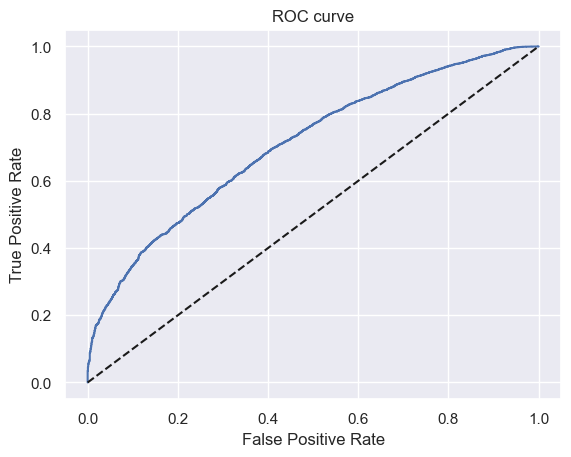

In [64]:
plt.plot(fpr, tpr)
plt.plot(fpr,fpr, linestyle='--' , color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

* Area under the ROC curve is called AUC(area under the curve), under blue curve

In [65]:
AUROC = roc_auc_score(df_actual_predicated_probs['loan_data_targets_test'],df_actual_predicated_probs['y_hat_test_proba'])
AUROC

0.7086447751136749

# Evaluation of the Model Performance

## Gini and Kolmogorov-smirnov
>First sorting of probabilities for GINI 

In [66]:
df_actual_predicated_probs = df_actual_predicated_probs.sort_values('y_hat_test_proba')

In [67]:
df_actual_predicated_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.210700,0
42344,1,0.266273,0
42404,1,0.298727,0
41948,1,0.306632,0
41957,0,0.351286,0


In [68]:
df_actual_predicated_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
9955,1,0.999738,1
12079,1,0.999745,1
17502,1,0.999750,1
11402,1,0.999762,1
12743,1,0.999790,1


In [69]:
df_actual_predicated_probs = df_actual_predicated_probs.reset_index()

In [70]:
df_actual_predicated_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.210700,0
1,42344,1,0.266273,0
2,42404,1,0.298727,0
3,41948,1,0.306632,0
4,41957,0,0.351286,0


For Gini we Need

* the cumulative % of total population
* the cumulative % of good borrowers
* the cumulative % of bad borrowers

In [71]:
df_actual_predicated_probs['Cumulative || Population'] = df_actual_predicated_probs.index+1
df_actual_predicated_probs['Cumulative || Good'] = df_actual_predicated_probs['loan_data_targets_test'].cumsum()
df_actual_predicated_probs['Cumulative || Bad'] = df_actual_predicated_probs['Cumulative || Population'] - df_actual_predicated_probs['loan_data_targets_test'].cumsum()

In [72]:
df_actual_predicated_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative || Population,Cumulative || Good,Cumulative || Bad
0,42341,1,0.210700,0,1,1,0
1,42344,1,0.266273,0,2,2,0
2,42404,1,0.298727,0,3,3,0
3,41948,1,0.306632,0,4,4,0
4,41957,0,0.351286,0,5,4,1


In [73]:
df_actual_predicated_probs['Cumulative Perc Population'] = df_actual_predicated_probs['Cumulative || Population'] / (df_actual_predicated_probs.shape[0])
df_actual_predicated_probs['Cumulative Perc Good'] = df_actual_predicated_probs['Cumulative || Good']/ df_actual_predicated_probs['loan_data_targets_test'].sum()
df_actual_predicated_probs['Cumulative Perc Bad'] = df_actual_predicated_probs['Cumulative || Bad'] / (df_actual_predicated_probs.shape[0] - df_actual_predicated_probs['loan_data_targets_test'].sum())

In [74]:
df_actual_predicated_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative || Population,Cumulative || Good,Cumulative || Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.210700,0,1,1,0,0.000011,0.000011,0.000000
1,42344,1,0.266273,0,2,2,0,0.000021,0.000022,0.000000
2,42404,1,0.298727,0,3,3,0,0.000032,0.000033,0.000000
3,41948,1,0.306632,0,4,4,0,0.000043,0.000044,0.000000
4,41957,0,0.351286,0,5,4,1,0.000054,0.000044,0.000581


Text(0.5, 1.0, 'Gini')

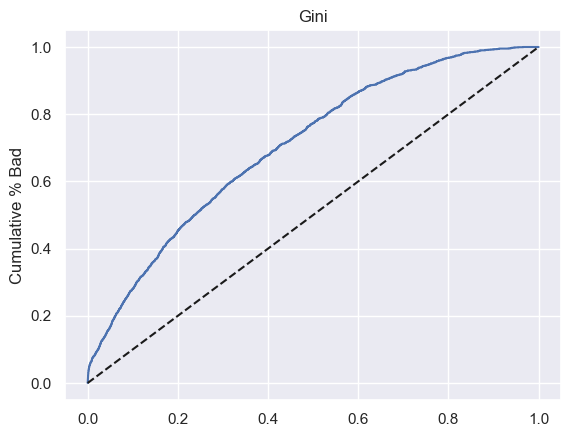

In [75]:
plt.plot(df_actual_predicated_probs['Cumulative Perc Population'], df_actual_predicated_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicated_probs['Cumulative Perc Population'], df_actual_predicated_probs['Cumulative Perc Population'] , linestyle='--',color='k')
plt.ylabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

> Calculating Gini index by analytical method

In [76]:
Gini = AUROC*2 -1
Gini

0.4172895502273497

## KS

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

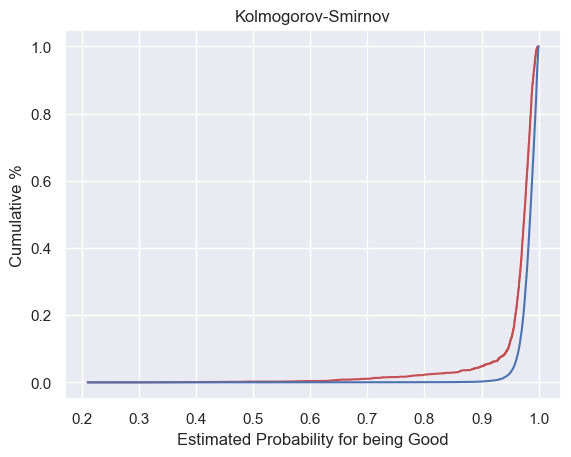

In [77]:
plt.plot(df_actual_predicated_probs['y_hat_test_proba'], df_actual_predicated_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicated_probs['y_hat_test_proba'], df_actual_predicated_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [78]:
KS = max(df_actual_predicated_probs['Cumulative Perc Bad'] - df_actual_predicated_probs['Cumulative Perc Good'])
KS

0.2875883837652873

> KS is not to good but, the two cumulative distribution functions are sufficiently far away from each other and the model has satisfactory predictive power

# Applying the PD Model

In [79]:
pd.options.display.max_columns = None

In [80]:
inputs_test_with_ref_cat.head()

,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,Grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership OWN,home_ownership MORTGAGE,addr_state:NV_LA,addr_state:HI_SD,addr_state:AZ_PA_OK,addr_state:MD_FL_VA_MA,addr_state:AR_DE_WV_MO_IN,addr_state:OH_NC,addr_state:AL_MI,addr_state:TX_NJ_GA,addr_state:AK_WI,addr_state:WA_CT,addr_state:NH_KS_DC_WY_ME_ID,addr_state:NE_IA_MS_MT_TN_RI_ND,addr_state:NY,addr_state:CA,addr_state:VT,verification_status:Verified,verification_status:Not Verified,verification_status:Source Verified,purpose:edu_small_house_mov,purpose:other_med,purpose:debt,purpose:_vaca_credit,purpose:major_rene_car_wedd,initial_list_status:f,initial_list_status:w,term_int:36,term_int:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-3,emp_length_int:4-5,emp_length_int:6-8,emp_length_int:9,emp_length_int:10,months_issue_date:<38,months_issue_date:40-49,months_issue_date:49-56,months_issue_date:56-60,months_issue_date:60-66,months_issue_date:66-74,months_issue_date:74-82,months_issue_date:>82,int_rate:<7.071,int_rate:7.071-11.199,int_rate:11.199-13.263,int_rate:13.263-15.327,int_rate:15.327-19.868,int_rate:19.868-25.234,int_rate:>25.324,mths_since_earliest_cr_line_factor:<126,mths_since_earliest_cr_line_factor:126-173,mths_since_earliest_cr_line_factor:173-345,mths_since_earliest_cr_line_factor:345-438,mths_since_earliest_cr_line_factor:>438,inq_last_6mths:0-3,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:3-18,mths_since_last_delinq:18-30,mths_since_last_delinq:30-82,mths_since_last_delinq:>82,dti:<=1.2,dti:1.2-4.3,dti:4.3-13.9,dti:13.9-21.9,dti:21.9-27.9,dti:27.9-30.7,dti:30.7-34.7,dti:>34.7,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [81]:
summary_table.head()

,Feature name,Coefficients,p_values
0,Intercept,-1.352940,NaN
1,Grade:A,1.646616,4.257252e-19
2,Grade:B,1.162325,3.214945e-12
3,Grade:C,0.942375,4.764591e-10
4,Grade:D,0.664746,2.749623e-06


In [82]:
y_hat_test_proba

array([0.98338209, 0.93899631, 0.99537578, ..., 0.99289276, 0.99431229,
       0.99646578])

In [83]:
ref_categories

['Grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:NE_IA_MS_MT_TN_RI_ND',
 'verification_status:Verified',
 'purpose:edu_small_house_mov',
 'initial_list_status:f',
 'term_int:60',
 'emp_length_int:0',
 'months_issue_date:>82',
 'int_rate:>25.324',
 'mths_since_earliest_cr_line_factor:<126',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'mths_since_last_delinq:0-3',
 'dti:>34.7',
 'mths_since_last_record:0-2']

In [84]:
df_ref_categories = pd.DataFrame(ref_categories,columns=['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,Grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:NE_IA_MS_MT_TN_RI_ND,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:edu_small_house_mov,0,NaN
5,initial_list_status:f,0,NaN
6,term_int:60,0,NaN
7,emp_length_int:0,0,NaN
8,months_issue_date:>82,0,NaN
9,int_rate:>25.324,0,NaN


# Score Card

In [85]:
df_scorecard = pd.concat([summary_table,df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard.head()

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.352940,NaN
1,1,Grade:A,1.646616,4.257252e-19
2,2,Grade:B,1.162325,3.214945e-12
3,3,Grade:C,0.942375,4.764591e-10
4,4,Grade:D,0.664746,2.749623e-06


In [86]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.352940,NaN,Intercept
1,1,Grade:A,1.646616,4.257252e-19,Grade
2,2,Grade:B,1.162325,3.214945e-12,Grade
3,3,Grade:C,0.942375,4.764591e-10,Grade
4,4,Grade:D,0.664746,2.749623e-06,Grade


In [87]:
min_score = 300
max_score = 850

In [88]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Grade                                 0.000000
Intercept                            -1.352940
acc_now_delinq                        0.000000
addr_state                           -0.269776
annual_inc                           -0.155800
dti                                   0.000000
emp_length_int                       -0.130687
home_ownership                        0.000000
home_ownership MORTGAGE               0.157803
home_ownership OWN                    0.130969
initial_list_status                  -0.004376
inq_last_6mths                        0.000000
int_rate                             -0.242269
months_issue_date                    -0.019081
mths_since_earliest_cr_line_factor    0.000000
mths_since_last_delinq                0.000000
mths_since_last_record                0.000000
purpose                               0.000000
term_int                              0.000000
verification_status                  -0.036760
Name: Coefficients, dtype: float64

In [89]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.9229162338015295

In [90]:
max_sum_coeff=df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coeff

9.807852779438411

In [91]:
df_scorecard['Score-Calculations'] = df_scorecard['Coefficients'] * ((max_score- min_score)/(max_sum_coeff - min_sum_coef))
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculations
0,0,Intercept,-1.352940,NaN,Intercept,-63.432939
1,1,Grade:A,1.646616,4.257252e-19,Grade,77.201997
2,2,Grade:B,1.162325,3.214945e-12,Grade,54.495911
3,3,Grade:C,0.942375,4.764591e-10,Grade,44.183473
4,4,Grade:D,0.664746,2.749623e-06,Grade,31.166771


In [92]:
df_scorecard['Score-Calculations'][0] = ((df_scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coeff-min_sum_coef))*(max_score-min_score)+min_score
df_scorecard.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11288\3372374633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Calculations'][0] = ((df_scorecard['Coefficients'][0]-min_sum_coef)/(max_sum_coeff-min_sum_coef))*(max_score-min_score)+min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculations
0,0,Intercept,-1.352940,NaN,Intercept,326.723463
1,1,Grade:A,1.646616,4.257252e-19,Grade,77.201997
2,2,Grade:B,1.162325,3.214945e-12,Grade,54.495911
3,3,Grade:C,0.942375,4.764591e-10,Grade,44.183473
4,4,Grade:D,0.664746,2.749623e-06,Grade,31.166771


In [93]:
df_scorecard['Score-Preliminary'] = df_scorecard['Score-Calculations'].round()
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculations,Score-Preliminary
0,0,Intercept,-1.352940,NaN,Intercept,326.723463,327.0
1,1,Grade:A,1.646616,4.257252e-19,Grade,77.201997,77.0
2,2,Grade:B,1.162325,3.214945e-12,Grade,54.495911,54.0
3,3,Grade:C,0.942375,4.764591e-10,Grade,44.183473,44.0
4,4,Grade:D,0.664746,2.749623e-06,Grade,31.166771,31.0


In [94]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Preliminary'].min().sum()
min_sum_score_prel

300.0

In [95]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Preliminary'].max().sum()
max_sum_score_prel

851.0

In [96]:
df_scorecard['Difference'] = df_scorecard['Score-Preliminary'] - df_scorecard['Score-Calculations']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculations,Score-Preliminary,Difference
0,0,Intercept,-1.352940,NaN,Intercept,326.723463,327.0,0.276537
1,1,Grade:A,1.646616,4.257252e-19,Grade,77.201997,77.0,-0.201997
2,2,Grade:B,1.162325,3.214945e-12,Grade,54.495911,54.0,-0.495911
3,3,Grade:C,0.942375,4.764591e-10,Grade,44.183473,44.0,-0.183473
4,4,Grade:D,0.664746,2.749623e-06,Grade,31.166771,31.0,-0.166771
5,5,Grade:E,0.344822,1.080571e-02,Grade,16.167045,16.0,-0.167045
6,6,Grade:F,0.193864,1.453522e-01,Grade,9.089372,9.0,-0.089372
7,7,home_ownership OWN,0.130969,3.929184e-03,home_ownership OWN,6.140516,6.0,-0.140516
8,8,home_ownership MORTGAGE,0.157803,4.490108e-08,home_ownership MORTGAGE,7.398644,7.0,-0.398644
9,9,addr_state:NV_LA,-0.269776,5.042369e-04,addr_state,-12.648498,-13.0,-0.351502


In [97]:
df_scorecard['Difference'].max()

0.47367321648111727

In [98]:
df_scorecard['Score-Final'] = df_scorecard['Score-Preliminary']
df_scorecard['Score-Final'][71] = 13
df_scorecard.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11288\205731639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Final'][71] = 13


,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculations,Score-Preliminary,Difference,Score-Final
0,0,Intercept,-1.352940,NaN,Intercept,326.723463,327.0,0.276537,327.0
1,1,Grade:A,1.646616,4.257252e-19,Grade,77.201997,77.0,-0.201997,77.0
2,2,Grade:B,1.162325,3.214945e-12,Grade,54.495911,54.0,-0.495911,54.0
3,3,Grade:C,0.942375,4.764591e-10,Grade,44.183473,44.0,-0.183473,44.0
4,4,Grade:D,0.664746,2.749623e-06,Grade,31.166771,31.0,-0.166771,31.0


In [99]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Final'].min().sum()
min_sum_score_prel

300.0

In [100]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Final'].max(). sum()
max_sum_score_prel

851.0

# Calculating Credit Score

In [101]:
inputs_test_with_ref_cat.head()

,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,Grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership OWN,home_ownership MORTGAGE,addr_state:NV_LA,addr_state:HI_SD,addr_state:AZ_PA_OK,addr_state:MD_FL_VA_MA,addr_state:AR_DE_WV_MO_IN,addr_state:OH_NC,addr_state:AL_MI,addr_state:TX_NJ_GA,addr_state:AK_WI,addr_state:WA_CT,addr_state:NH_KS_DC_WY_ME_ID,addr_state:NE_IA_MS_MT_TN_RI_ND,addr_state:NY,addr_state:CA,addr_state:VT,verification_status:Verified,verification_status:Not Verified,verification_status:Source Verified,purpose:edu_small_house_mov,purpose:other_med,purpose:debt,purpose:_vaca_credit,purpose:major_rene_car_wedd,initial_list_status:f,initial_list_status:w,term_int:36,term_int:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-3,emp_length_int:4-5,emp_length_int:6-8,emp_length_int:9,emp_length_int:10,months_issue_date:<38,months_issue_date:40-49,months_issue_date:49-56,months_issue_date:56-60,months_issue_date:60-66,months_issue_date:66-74,months_issue_date:74-82,months_issue_date:>82,int_rate:<7.071,int_rate:7.071-11.199,int_rate:11.199-13.263,int_rate:13.263-15.327,int_rate:15.327-19.868,int_rate:19.868-25.234,int_rate:>25.324,mths_since_earliest_cr_line_factor:<126,mths_since_earliest_cr_line_factor:126-173,mths_since_earliest_cr_line_factor:173-345,mths_since_earliest_cr_line_factor:345-438,mths_since_earliest_cr_line_factor:>438,inq_last_6mths:0-3,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:3-18,mths_since_last_delinq:18-30,mths_since_last_delinq:30-82,mths_since_last_delinq:>82,dti:<=1.2,dti:1.2-4.3,dti:4.3-13.9,dti:13.9-21.9,dti:21.9-27.9,dti:27.9-30.7,dti:30.7-34.7,dti:>34.7,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [102]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculations,Score-Preliminary,Difference,Score-Final
0,0,Intercept,-1.352940,NaN,Intercept,326.723463,327.0,0.276537,327.0
1,1,Grade:A,1.646616,4.257252e-19,Grade,77.201997,77.0,-0.201997,77.0
2,2,Grade:B,1.162325,3.214945e-12,Grade,54.495911,54.0,-0.495911,54.0
3,3,Grade:C,0.942375,4.764591e-10,Grade,44.183473,44.0,-0.183473,44.0
4,4,Grade:D,0.664746,2.749623e-06,Grade,31.166771,31.0,-0.166771,31.0


In [103]:
inputs_test_with_ref_cat_v_intercept = inputs_train_with_ref_cat

In [104]:
inputs_test_with_ref_cat_v_intercept.insert(0,'Intercept', 1)

In [105]:
inputs_test_with_ref_cat_v_intercept.head()

,Intercept,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,Grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership OWN,home_ownership MORTGAGE,addr_state:NV_LA,addr_state:HI_SD,addr_state:AZ_PA_OK,addr_state:MD_FL_VA_MA,addr_state:AR_DE_WV_MO_IN,addr_state:OH_NC,addr_state:AL_MI,addr_state:TX_NJ_GA,addr_state:AK_WI,addr_state:WA_CT,addr_state:NH_KS_DC_WY_ME_ID,addr_state:NE_IA_MS_MT_TN_RI_ND,addr_state:NY,addr_state:CA,addr_state:VT,verification_status:Verified,verification_status:Not Verified,verification_status:Source Verified,purpose:edu_small_house_mov,purpose:other_med,purpose:debt,purpose:_vaca_credit,purpose:major_rene_car_wedd,initial_list_status:f,initial_list_status:w,term_int:36,term_int:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-3,emp_length_int:4-5,emp_length_int:6-8,emp_length_int:9,emp_length_int:10,months_issue_date:<38,months_issue_date:40-49,months_issue_date:49-56,months_issue_date:56-60,months_issue_date:60-66,months_issue_date:66-74,months_issue_date:74-82,months_issue_date:>82,int_rate:<7.071,int_rate:7.071-11.199,int_rate:11.199-13.263,int_rate:13.263-15.327,int_rate:15.327-19.868,int_rate:19.868-25.234,int_rate:>25.324,mths_since_earliest_cr_line_factor:<126,mths_since_earliest_cr_line_factor:126-173,mths_since_earliest_cr_line_factor:173-345,mths_since_earliest_cr_line_factor:345-438,mths_since_earliest_cr_line_factor:>438,inq_last_6mths:0-3,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:3-18,mths_since_last_delinq:18-30,mths_since_last_delinq:30-82,mths_since_last_delinq:>82,dti:<=1.2,dti:1.2-4.3,dti:4.3-13.9,dti:13.9-21.9,dti:21.9-27.9,dti:27.9-30.7,dti:30.7-34.7,dti:>34.7,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85
427211,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
206088,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
136020,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
412305,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
36159,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [106]:
inputs_test_with_ref_cat_v_intercept = inputs_test_with_ref_cat_v_intercept[df_scorecard['Feature name'].values]

In [107]:
inputs_test_with_ref_cat_v_intercept.head()

,Intercept,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,home_ownership OWN,home_ownership MORTGAGE,addr_state:NV_LA,addr_state:HI_SD,addr_state:AZ_PA_OK,addr_state:MD_FL_VA_MA,addr_state:AR_DE_WV_MO_IN,addr_state:OH_NC,addr_state:AL_MI,addr_state:TX_NJ_GA,addr_state:AK_WI,addr_state:WA_CT,addr_state:NH_KS_DC_WY_ME_ID,addr_state:NY,addr_state:CA,addr_state:VT,verification_status:Not Verified,verification_status:Source Verified,purpose:other_med,purpose:debt,purpose:_vaca_credit,purpose:major_rene_car_wedd,initial_list_status:w,term_int:36,emp_length_int:1,emp_length_int:2-3,emp_length_int:4-5,emp_length_int:6-8,emp_length_int:9,emp_length_int:10,months_issue_date:<38,months_issue_date:40-49,months_issue_date:49-56,months_issue_date:56-60,months_issue_date:60-66,months_issue_date:66-74,months_issue_date:74-82,int_rate:<7.071,int_rate:7.071-11.199,int_rate:11.199-13.263,int_rate:13.263-15.327,int_rate:15.327-19.868,int_rate:19.868-25.234,mths_since_earliest_cr_line_factor:126-173,mths_since_earliest_cr_line_factor:173-345,mths_since_earliest_cr_line_factor:345-438,mths_since_earliest_cr_line_factor:>438,inq_last_6mths:0-3,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:3-18,mths_since_last_delinq:18-30,mths_since_last_delinq:30-82,mths_since_last_delinq:>82,dti:<=1.2,dti:1.2-4.3,dti:4.3-13.9,dti:13.9-21.9,dti:21.9-27.9,dti:27.9-30.7,dti:30.7-34.7,mths_since_last_record:Missing,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85,Grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:NE_IA_MS_MT_TN_RI_ND,verification_status:Verified,purpose:edu_small_house_mov,initial_list_status:f,term_int:60,emp_length_int:0,months_issue_date:>82,int_rate:>25.324,mths_since_earliest_cr_line_factor:<126,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,mths_since_last_delinq:0-3,dti:>34.7,mths_since_last_record:0-2
427211,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
206088,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
136020,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
412305,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
36159,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0


In [108]:
scorecard_scores = df_scorecard['Score-Final']

In [109]:
inputs_test_with_ref_cat_v_intercept.shape
scorecard_scores.shape

(103,)

In [110]:
scorecard_scores = scorecard_scores.values.reshape(103, 1)

In [111]:
y_scores = inputs_test_with_ref_cat_v_intercept.dot(scorecard_scores)

In [112]:
y_scores.head()

,0
427211,629.0
206088,648.0
136020,646.0
412305,546.0
36159,569.0


In [113]:
y_scores.min()

0    335.0
dtype: float64

# From Credit Score to Pd

In [114]:
sum_coef_from_score = ((y_scores-min_score)/(max_score-min_score))*(max_sum_coeff-min_sum_coef)+min_sum_coef

In [115]:
y_hat_proba_from_score = np.exp(sum_coef_from_score)/(np.exp(sum_coef_from_score)+1)
y_hat_proba_from_score.head()

,0
427211,0.993905
206088,0.995928
136020,0.995751
412305,0.965241
36159,0.978427


In [116]:
y_hat_test_proba[0:5]

array([0.98338209, 0.93899631, 0.99537578, 0.97632203, 0.99665181])

# Setting Cut-off rate

Text(0.5, 1.0, 'ROC curve')

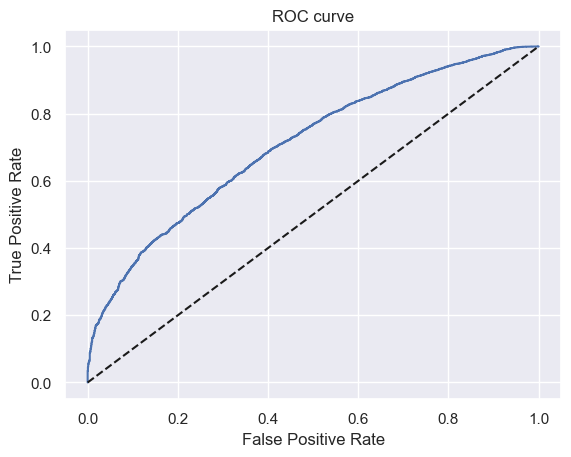

In [117]:
plt.plot(fpr, tpr)
plt.plot(fpr,fpr, linestyle='--' , color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [118]:
thresholds

array([       inf, 0.99979033, 0.99924341, ..., 0.35701671, 0.35128563,
       0.21070027])

In [119]:
thresholds.shape

(4256,)

In [120]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds),pd.DataFrame(fpr),pd.DataFrame(tpr)],axis=1)

In [121]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [122]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.0,0.000000
1,0.999790,0.0,0.000011
2,0.999243,0.0,0.010422
3,0.999243,0.0,0.010444
4,0.998874,0.0,0.021161


In [123]:
df_cutoffs['thresholds'][0] =1-1/np.power(10,16)

In [124]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.0,0.000000
1,0.999790,0.0,0.000011
2,0.999243,0.0,0.010422
3,0.999243,0.0,0.010444
4,0.998874,0.0,0.021161


In [125]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds']/(1-df_cutoffs['thresholds']))-min_sum_coef)*((max_score-min_score)/(max_sum_coeff-min_sum_coef))+min_score).round()

In [126]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,1391.0
1,0.999790,0.0,0.000011,787.0
2,0.999243,0.0,0.010422,727.0
3,0.999243,0.0,0.010444,727.0
4,0.998874,0.0,0.021161,708.0


In [127]:
df_cutoffs['Score'][0] = max_score

In [128]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,850.0
1,0.999790,0.0,0.000011,787.0
2,0.999243,0.0,0.010422,727.0
3,0.999243,0.0,0.010444,727.0
4,0.998874,0.0,0.021161,708.0


In [129]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
4251,0.428211,0.998838,0.999945,377.0
4252,0.420118,0.999419,0.999945,375.0
4253,0.357017,0.999419,0.999956,363.0
4254,0.351286,1.000000,0.999956,361.0
4255,0.210700,1.000000,1.000000,328.0


In [130]:
def n_approved(p):
    return np.where(df_actual_predicated_probs['y_hat_test_proba'] >= p,1,0).sum()

In [131]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejectedd'] = df_actual_predicated_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicated_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] =1 - df_cutoffs['Approval Rate']

In [132]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejectedd,Approval Rate,Rejection Rate
0,1.000000,0.0,0.000000,850.0,0,93257,0.000000,1.000000
1,0.999790,0.0,0.000011,787.0,1,93256,0.000011,0.999989
2,0.999243,0.0,0.010422,727.0,954,92303,0.010230,0.989770
3,0.999243,0.0,0.010444,727.0,956,92301,0.010251,0.989749
4,0.998874,0.0,0.021161,708.0,1937,91320,0.020771,0.979229


In [133]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejectedd,Approval Rate,Rejection Rate
4251,0.428211,0.998838,0.999945,377.0,93250,7,0.999925,0.000075
4252,0.420118,0.999419,0.999945,375.0,93251,6,0.999936,0.000064
4253,0.357017,0.999419,0.999956,363.0,93252,5,0.999946,0.000054
4254,0.351286,1.000000,0.999956,361.0,93253,4,0.999957,0.000043
4255,0.210700,1.000000,1.000000,328.0,93257,0,1.000000,0.000000


In [134]:
# inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [135]:
inputs_train_with_ref_cat.shape

(373028, 103)